# NN

In [1]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_curve

import scikitplot as skplt
import matplotlib.pyplot as plt

## Lendo bases

In [2]:
df_mean = pd.read_csv("preprocessamento/data_mean.data", sep=',', header=None, index_col=0)
df_mode = pd.read_csv("preprocessamento/data_mode.data", sep=',', header=None, index_col=0)
df_dropna = pd.read_csv("preprocessamento/data_dropna.data", sep=',', header=None, index_col=0)

## Escolhendo a base

In [12]:
df = df_dropna

df_mean

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
0,5.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3,1.00000,1.000000,2
1,5.000000,4.000000,4.000000,5.000000,7.000000,10.000000,3,2.00000,1.000000,2
2,3.000000,1.000000,1.000000,1.000000,3.217765,2.000000,3,1.00000,1.000000,2
3,6.000000,8.000000,8.000000,1.000000,3.000000,4.000000,3,2.87373,1.000000,2
4,4.000000,1.000000,1.000000,3.000000,2.000000,1.000000,3,1.00000,1.000000,2
5,8.000000,10.000000,10.000000,8.000000,7.000000,10.000000,9,7.00000,1.000000,4
6,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,3,1.00000,1.591954,2
7,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3,1.00000,1.000000,2
8,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1,1.00000,5.000000,2


In [4]:
X = df[df.columns[:-1]] 
y = df[df.columns[-1]]

## Classificador

In [5]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(20), random_state=42)

## Divisão da base

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

## Treino

In [7]:
clf.fit(X_train, y_train)    #a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Teste

In [8]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

## Resultados

In [9]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

fpr, tpr, th = roc_curve(y_test, y_pred, pos_label=4)
print("AUC: ", auc(fpr, tpr))

Accuracy:  0.9639175257731959
AUC:  0.9655529953917051


### Plot ROC Curve

/home/demenezes/git/SI6/ex1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


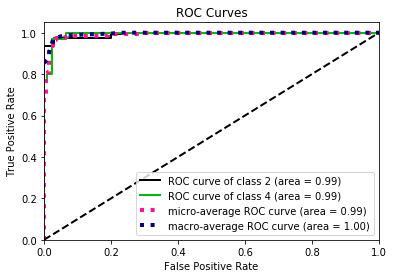

In [10]:
skplt.metrics.plot_roc_curve(y_test, y_prob)

plt.show()